In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.chdir('..')
print(os.getcwd())



/home/yoyee/Documents/deepSfm


In [2]:
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
# from superpoint.datasets.patches_dataset import PatchesDataset
# from utils import plot_imgs
from utils.draw import plot_imgs
from models.classical_detectors_descriptors import classical_detector_descriptor

from settings import DATA_PATH
%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

In [3]:
config = {'name': 'patches_dataset', 'dataset': 'hpatches', 'alteration': 'v', 'preprocessing': {'resize': [240, 360]}} #'truncate': 50, 
# dataset = PatchesDataset(**config)
# data = dataset.get_test_set()

In [4]:
def draw_keypoints(img, corners, color):
    keypoints = [cv2.KeyPoint(c[1], c[0], 1) for c in np.stack(corners).T]
    return cv2.drawKeypoints(img.astype(np.uint8), keypoints, None, color=color)

In [5]:
def SIFT_det(img, img_rgb, visualize=False):
    # Initiate SIFT detector
    # pip install opencv-python==3.4.2.16, opencv-contrib-python==3.4.2.16
    # https://www.pyimagesearch.com/2015/07/16/where-did-sift-and-surf-go-in-opencv-3/
    sift = cv2.xfeatures2d.SIFT_create()

    # find the keypoints and descriptors with SIFT
    kp, des = sift.detectAndCompute(img,None)
    print("# kps: {}, descriptors: {}".format(len(kp), des.shape))
    x_all = np.array([p.pt for p in kp])

    if visualize:
        plt.figure(figsize=(30, 4))
        plt.imshow(img_rgb)
        plt.scatter(x_all[:, 0], x_all[:, 1], s=10, marker='o', c='y')
        plt.show()

    return x_all, kp, des

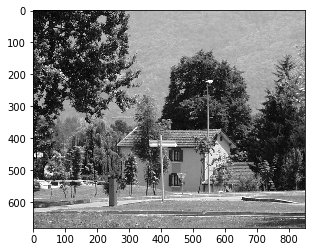

img shape:  (680, 850)
img shape:  uint8
# kps: 10261, descriptors: (10261, 128)


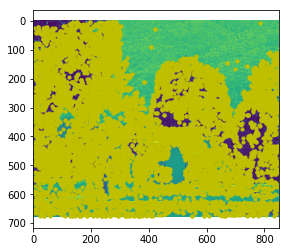

In [8]:
image = cv2.imread(str(Path(DATA_PATH, "HPatches/v_eastsouth/", "1.ppm")), 0)
plt.imshow(image, cmap='gray')
plt.show()
print("img shape: ", image.shape)
print("img shape: ", image.dtype)

x1_all, kp1, des1 = SIFT_det(image, image, visualize=True)

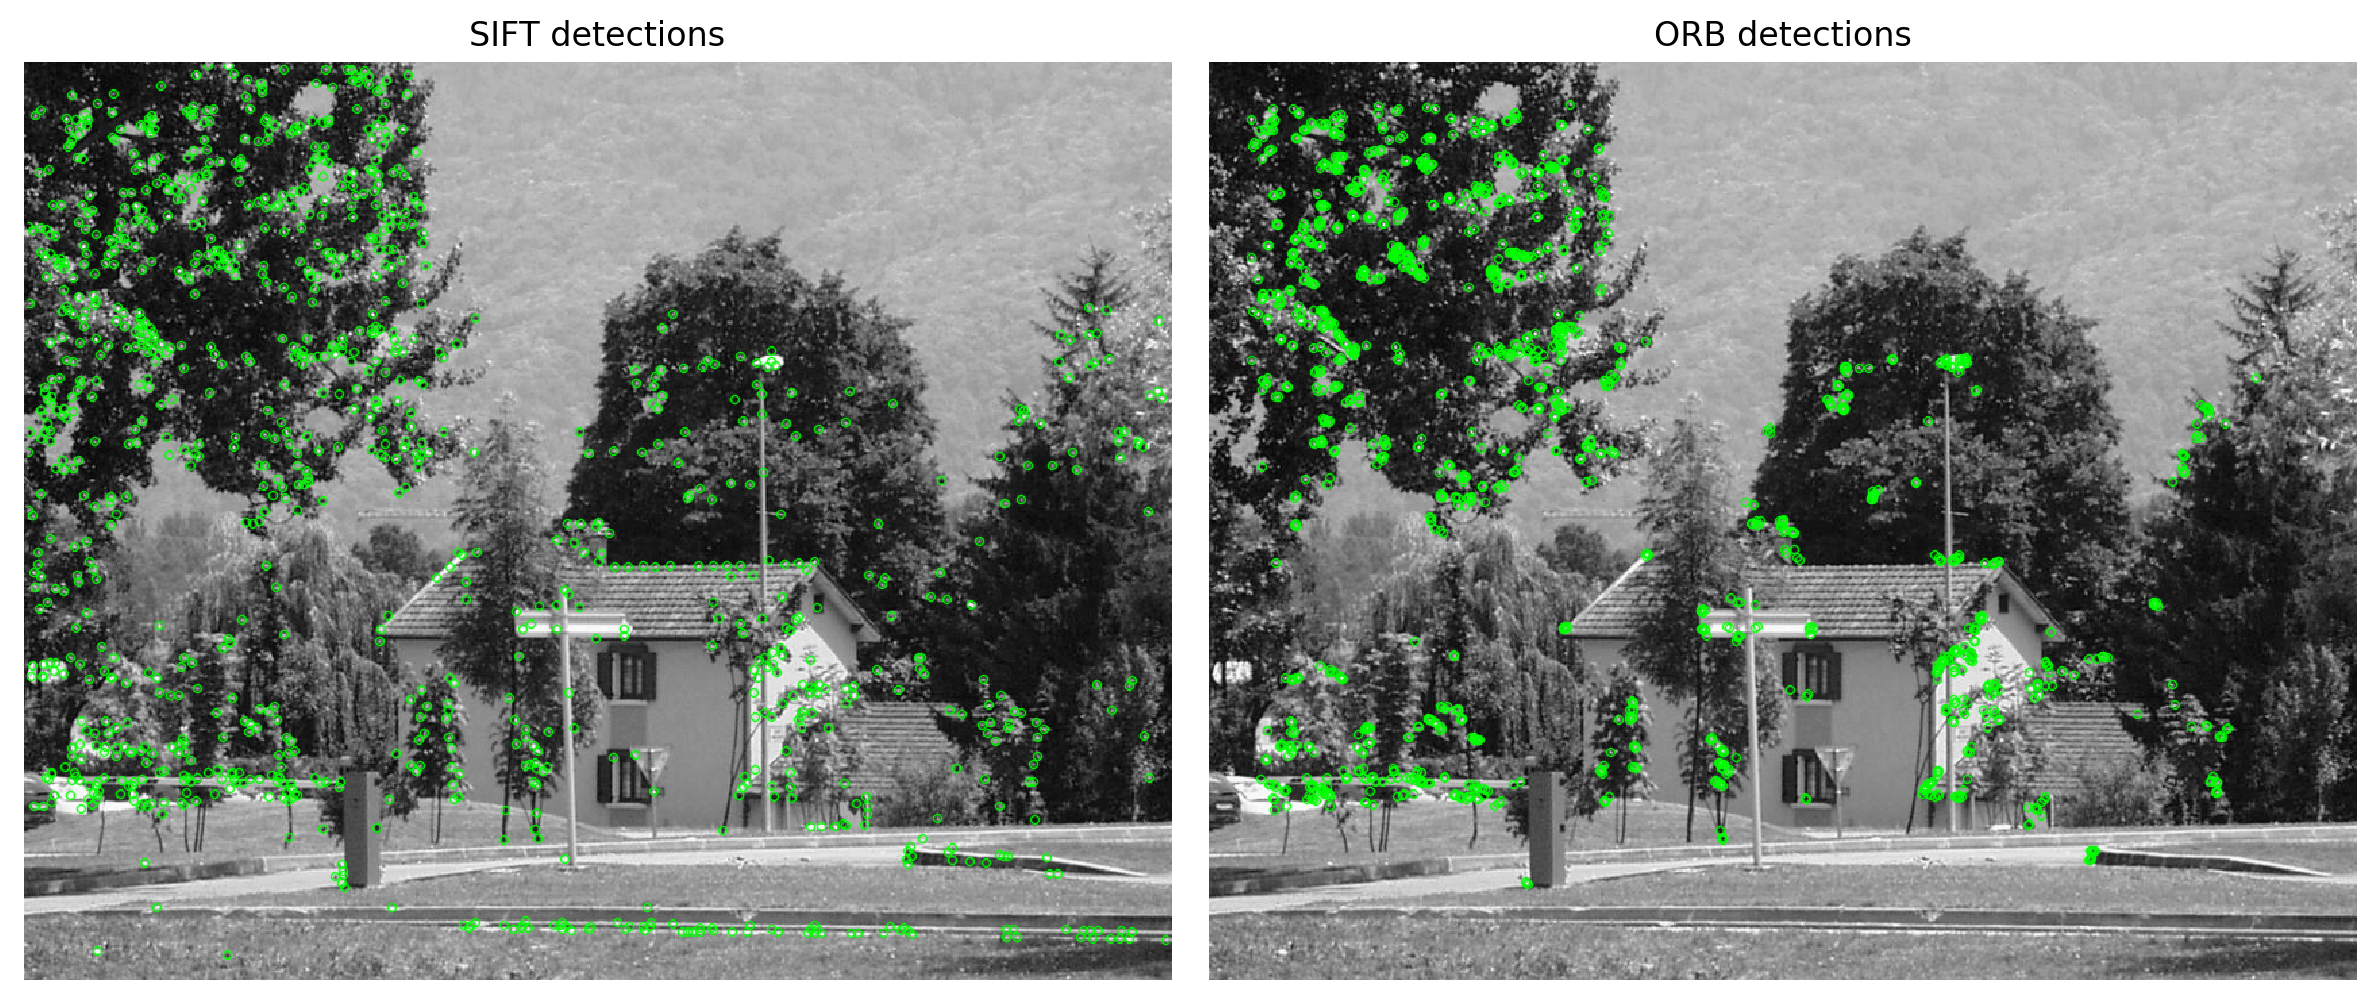

In [7]:
image = cv2.imread(str(Path(DATA_PATH, "HPatches/v_eastsouth/", "1.ppm")), 0)
sift_points, sift_desc = classical_detector_descriptor(image, **{'method': 'sift'})
sift_points = np.where(sift_points)
orb_points, orb_desc = classical_detector_descriptor(image, **{'method': 'orb'})
orb_points = np.where(orb_points)

sift_img = draw_keypoints(image.copy(), sift_points, (0, 255, 0))
orb_img = draw_keypoints(image.copy(), orb_points, (0, 255, 0))

plot_imgs([sift_img / 255., orb_img / 255.], titles=['SIFT detections', 'ORB detections'], dpi=200, cmap='gray')

In [11]:
sift_points, sift_desc = classical_detector_descriptor(image, **{'method': 'sift'})
y, x = np.where(sift_points)
pnts = np.stack((y, x), axis=1)
print("sift points: ", sift_points.shape)
print("points: ", pnts.shape)
print("sift_desc: ", sift_desc.shape)
# DATA_PATH
# os.getcwd()

sift points:  (680, 850)
points:  (1097, 2)
sift_desc:  (680, 850, 128)


In [12]:
desc = sift_desc[y, x, :]
print("desc shape: ", desc.shape)

desc shape:  (1097, 128)


In [13]:
image.max()


252

In [16]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(sift_desc,sift_desc)

error: OpenCV(3.4.2) /io/opencv/modules/core/src/batch_distance.cpp:238: error: (-215:Assertion failed) type == src2.type() && src1.cols == src2.cols && (type == 5 || type == 0) in function 'batchDistance'


In [20]:
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(image,None)
print("kp1: ", kp1)
print("des1: ", des1)

kp1:  [<KeyPoint 0x7f56821b5150>, <KeyPoint 0x7f56821b5450>, <KeyPoint 0x7f56821b52a0>, <KeyPoint 0x7f56824e2270>, <KeyPoint 0x7f56824e2210>, <KeyPoint 0x7f56824e2f30>, <KeyPoint 0x7f56824e22d0>, <KeyPoint 0x7f56824e2fc0>, <KeyPoint 0x7f56824e2ea0>, <KeyPoint 0x7f56820baa50>, <KeyPoint 0x7f56820ba8a0>, <KeyPoint 0x7f56820ba9c0>, <KeyPoint 0x7f56820baa20>, <KeyPoint 0x7f56820ba840>, <KeyPoint 0x7f56820ba600>, <KeyPoint 0x7f56820ba4b0>, <KeyPoint 0x7f56820ba7b0>, <KeyPoint 0x7f56820ba540>, <KeyPoint 0x7f56820ba720>, <KeyPoint 0x7f56820ba780>, <KeyPoint 0x7f56820ba630>, <KeyPoint 0x7f56820ba690>, <KeyPoint 0x7f56820ba510>, <KeyPoint 0x7f56820ba5a0>, <KeyPoint 0x7f56820ba6c0>, <KeyPoint 0x7f56820baa80>, <KeyPoint 0x7f56820baab0>, <KeyPoint 0x7f56820baae0>, <KeyPoint 0x7f56820bab10>, <KeyPoint 0x7f56820bab40>, <KeyPoint 0x7f56820bab70>, <KeyPoint 0x7f56820baba0>, <KeyPoint 0x7f56820babd0>, <KeyPoint 0x7f56820bac00>, <KeyPoint 0x7f56820bac30>, <KeyPoint 0x7f56820bac60>, <KeyPoint 0x7f56820ba